# Kết nối đến google drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import các thư viện cần thiết

In [2]:
import cv2 as cv
from skimage.feature import canny
from skimage.filters import laplace, sobel, roberts
import numpy as np
import matplotlib.pyplot as plt
import os

# Lấy đường dẫn dữ liệu

In [3]:
dataset_dir = '/content/drive/MyDrive/Đồ án CS231.M11/Dataset'
dblurred_dir = os.path.join(dataset_dir,'defocused_blurred')
mblurred_dir = os.path.join(dataset_dir,'motion_blurred')
sharp_dir = os.path.join(dataset_dir,'sharp')

In [4]:
sharp_images = sorted(os.listdir(sharp_dir))
dblurred_images = sorted(os.listdir(dblurred_dir))
mblurred_images = sorted(os.listdir(mblurred_dir))

In [5]:
print(len(sharp_images))
print(len(dblurred_images))
print(len(mblurred_images))

350
350
350


# Định nghĩa các hàm cần thiết

In [6]:
def detect_blur_fft(image, size=60, vis=False):
  # grab the dimensions of the image and use the dimensions to
  # derive the center (x, y)-coordinates
  (h, w) = image.shape
  (cX, cY) = (int(w / 2.0), int(h / 2.0))
  # check to see if we are visualizing our output
  fft = np.fft.fft2(image)
  fftShift = np.fft.fftshift(fft)

  if vis:
    # compute the magnitude spectrum of the transform
    magnitude = 20 * np.log(np.abs(fftShift))
    # display the original input image
    (fig, ax) = plt.subplots(1, 2, )
    ax[0].imshow(image, cmap="gray")
    ax[0].set_title("Input")
    ax[0].set_xticks([])
    ax[0].set_yticks([])
    # display the magnitude image
    ax[1].imshow(magnitude, cmap="gray")
    ax[1].set_title("Magnitude Spectrum")
    ax[1].set_xticks([])
    ax[1].set_yticks([])
    # show our plots
    plt.show()
    # zero-out the center of the FFT shift (i.e., remove low

  # frequencies), apply the inverse shift such that the DC
  # component once again becomes the top-left, and then apply
  # the inverse FFT
  fftShift[cY - size:cY + size, cX - size:cX + size] = 0
  fftShift = np.fft.ifftshift(fftShift)
  recon = np.fft.ifft2(fftShift)
  # compute the magnitude spectrum of the reconstructed image,
  # then compute the mean of the magnitude values
  magnitude = 20 * np.log(np.abs(recon))
  # the image will be considered "blurry" if the mean value of the
  # magnitudes is less than the threshold value
  return magnitude

In [7]:
# Hàm tính toán var cho dữ liệu
def get_features(dir,arr_path,opt="lap"):
  var_values = []
  max_values = []
  mean_values = []
  for img_path in arr_path:
    image = cv.imread(os.path.join(dir,img_path),0).astype(np.float)
    if opt=="lap":
      image = laplace(image)
    elif opt=="robert":
      image = roberts(image)
    elif opt=="sobel":
      image = sobel(image)
    elif opt=="fft":
      image = detect_blur_fft(image)
    else:
      image = canny(image)
    var_values.append(image.var())
    mean_values.append(image.mean())
    max_values.append(np.amax(image))
  return var_values,mean_values,max_values

In [18]:
def plot_hist(sharp_values,defocused_values,motion_values,opt=1,title=""):
  if opt==1:
    plt.hist(sharp_values, alpha=0.33, bins=20, color='r', range=(0,400), label='sharp')
    plt.hist(defocused_values, alpha=0.33, bins=20, color='b', range=(0,100), label='defocused')
    plt.hist(motion_values, alpha=0.33, bins=20, color='g', range=(0,100), label='motion')
    plt.legend()
    plt.title(title)
    plt.show()
  else:
    plt.hist(sharp_values, alpha=0.33, bins=20, color='r', label='sharp')
    plt.hist(defocused_values, alpha=0.33, bins=20, color='b', label='defocused')
    plt.hist(motion_values, alpha=0.33, bins=20, color='g', label='motion')
    plt.legend()
    plt.title(title)
    plt.show()

In [9]:
def plot_mean(dir,arr_path):
  for image in arr_path:
    _array = cv2.imread(os.path.join(dir,image))
    gray = cv2.cvtColor(_array, cv2.COLOR_BGR2GRAY)
    score_gray = cv2.Laplacian(gray, cv2.CV_64F).mean()
    score = cv2.Laplacian(_array, cv2.CV_64F).mean()
    print(score, score_gray)
    plt.imshow(_array)
    plt.show()

# Phân tích dữ liệu

## Laplace

In [ ]:
s_var_values,s_mean_values,s_max_values = get_features(sharp_dir,sharp_images)
d_var_values,d_mean_values,d_max_values = get_features(dblurred_dir,dblurred_images)
m_var_values,m_mean_values,m_max_values = get_features(mblurred_dir,mblurred_images)

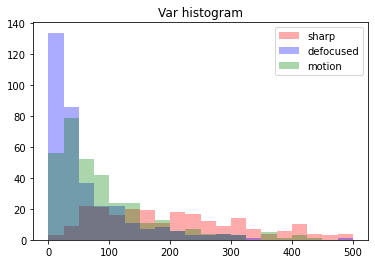

In [ ]:
plot_hist(s_var_values,d_var_values,m_var_values,title="Var histogram",opt=1)

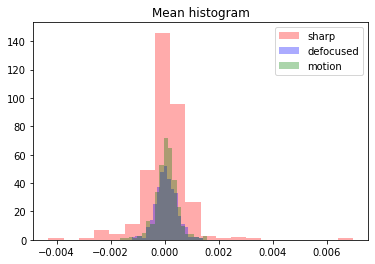

In [ ]:
plot_hist(s_mean_values,d_mean_values,m_mean_values,title="Mean histogram",opt=2)

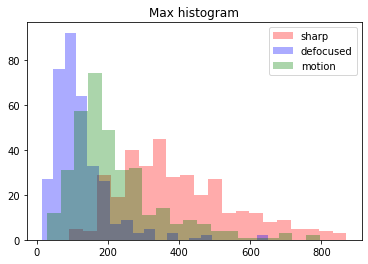

In [ ]:
plot_hist(s_max_values,d_max_values,m_max_values,title="Max histogram",opt=2)

## Thuật toán Canny

In [ ]:
s_var_values,s_mean_values,s_max_values = get_features(sharp_dir,sharp_images,opt="Canny")
d_var_values,d_mean_values,d_max_values = get_features(dblurred_dir,dblurred_images,opt="Canny")
m_var_values,m_mean_values,m_max_values = get_features(mblurred_dir,mblurred_images,opt="Canny")

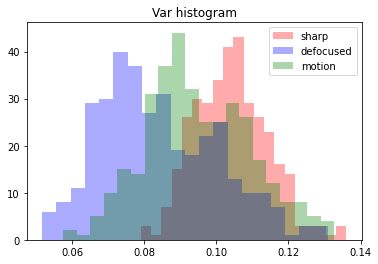

In [ ]:
plot_hist(s_var_values,d_var_values,m_var_values,title="Var histogram",opt=2)

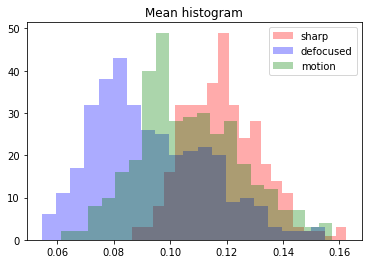

In [ ]:
plot_hist(s_mean_values,d_mean_values,m_mean_values,title="Mean histogram",opt=2)

## Toán tử Robert

In [10]:
s_var_values,s_mean_values,s_max_values = get_features(sharp_dir,sharp_images,opt="robert")
d_var_values,d_mean_values,d_max_values = get_features(dblurred_dir,dblurred_images,opt="robert")
m_var_values,m_mean_values,m_max_values = get_features(mblurred_dir,mblurred_images,opt="robert")

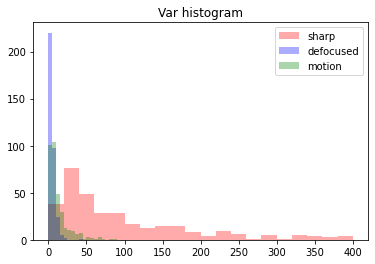

In [19]:
plot_hist(s_var_values,d_var_values,m_var_values,title="Var histogram",opt=1)

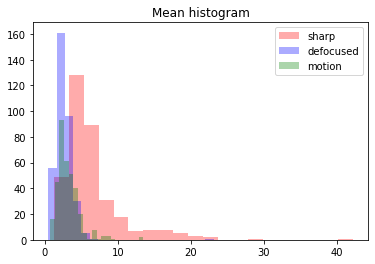

In [ ]:
plot_hist(s_mean_values,d_mean_values,m_mean_values,title="Mean histogram",opt=2)

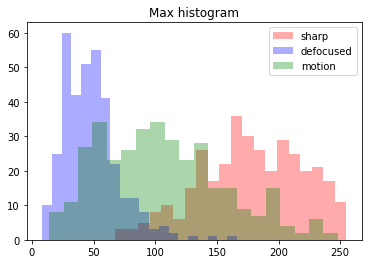

In [ ]:
plot_hist(s_max_values,d_max_values,m_max_values,title="Max histogram",opt=2)

## Toán tử Sobel

In [20]:
s_var_values,s_mean_values,s_max_values = get_features(sharp_dir,sharp_images,opt="sobel")
d_var_values,d_mean_values,d_max_values = get_features(dblurred_dir,dblurred_images,opt="sobel")
m_var_values,m_mean_values,m_max_values = get_features(mblurred_dir,mblurred_images,opt="sobel")

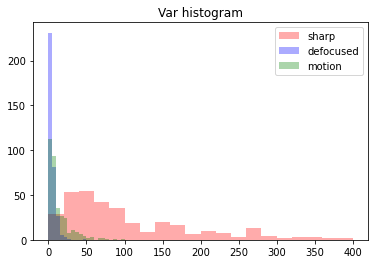

In [21]:
plot_hist(s_var_values,d_var_values,m_var_values,title="Var histogram",opt=1)

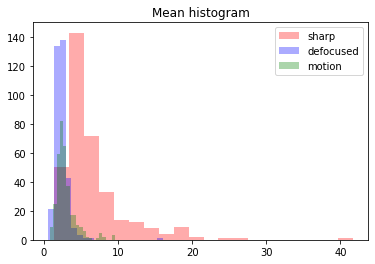

In [ ]:
plot_hist(s_mean_values,d_mean_values,m_mean_values,title="Mean histogram",opt=2)

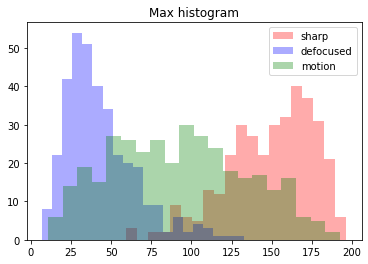

In [ ]:
plot_hist(s_max_values,d_max_values,m_max_values,title="Max histogram",opt=2)

##FFT

In [ ]:
s_var_values,s_mean_values,s_max_values = get_features(sharp_dir,sharp_images,opt="fft")
d_var_values,d_mean_values,d_max_values = get_features(dblurred_dir,dblurred_images,opt="fft")
m_var_values,m_mean_values,m_max_values = get_features(mblurred_dir,mblurred_images,opt="fft")

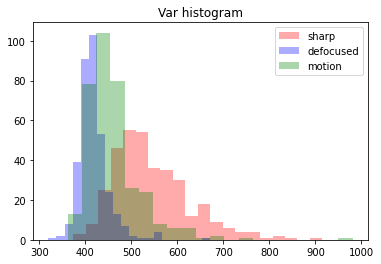

In [ ]:
plot_hist(s_var_values,d_var_values,m_var_values,title="Var histogram",opt=2)

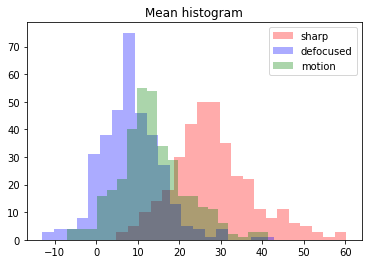

In [ ]:
plot_hist(s_mean_values,d_mean_values,m_mean_values,title="Mean histogram",opt=2)

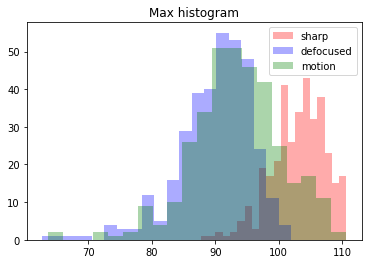

In [ ]:
plot_hist(s_max_values,d_max_values,m_max_values,title="Max histogram",opt=2)